<a href="https://colab.research.google.com/github/Arsema6/solar-challenge-week1/blob/core-CI%2FCd/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load Iris dataset
df = sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. Summary Statistics & Missing-Value Report

In [5]:
# Overview of numeric columns
print("The description of the numeric columns:")
print(df.describe())
# Overview of categorical columns
print("---------------------------------")
print("The description of the categorical columns:")
print(df.describe(include=['object']))
# Overview of all columns
print("---------------------------------")
print("The description of all columns:")
print(df.describe(include='all'))
# Overview of the dataset
print("---------------------------------")
print("An overview of the dataset: the first 5 rows")
print(df.head())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the last 5 rows")
print(df.tail())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: a random sample of 5 rows")
print(df.sample(5))
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the shape of the dataset")
print(df.info())
# Check for missing values
print("----------------------------------")
print("Check for missing values:")
print(df.isna().sum())

The description of the numeric columns:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
---------------------------------
The description of the categorical columns:
       species
count      150
unique       3
top     setosa
freq        50
---------------------------------
The description of all columns:
        sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN   

2. Outlier Detection

In [6]:
def plot_correlation_matrix(df):
    """
    Plot the correlation matrix of the dataset.
    :param df: The dataset
    :return: None
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Matrix")
    plt.show()

In [7]:
# Identify numeric columns

# Compute Z-scores and flag outliers (|Z| > 3)
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 1


In [8]:
for col in numeric_cols:
    df.loc[outlier_flags, col] = df[col].median()
numeric_cols = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm"]

# Compute Z-scores and flag outliers (|Z| > 3)
# Adjust column names to match the actual DataFrame
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 0


3. Univariate Visualizations

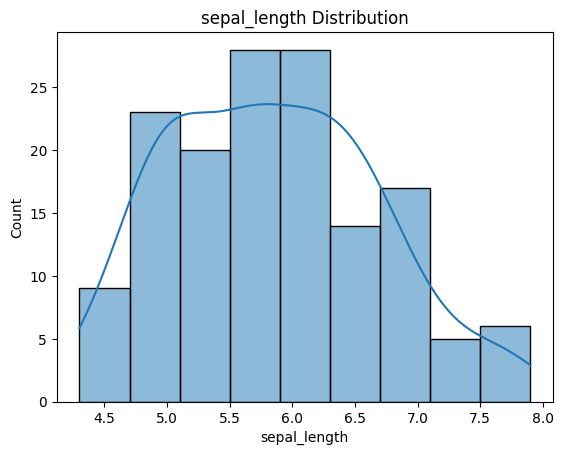

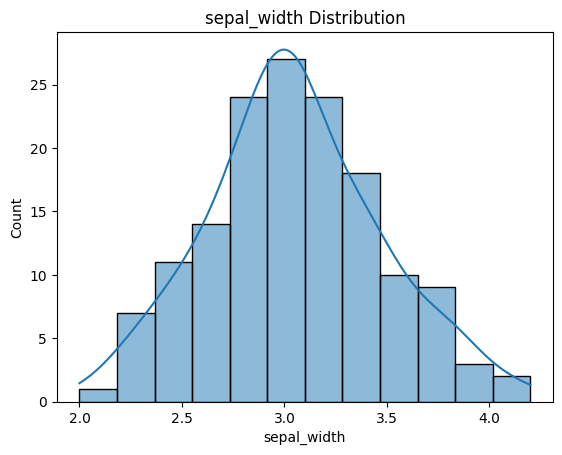

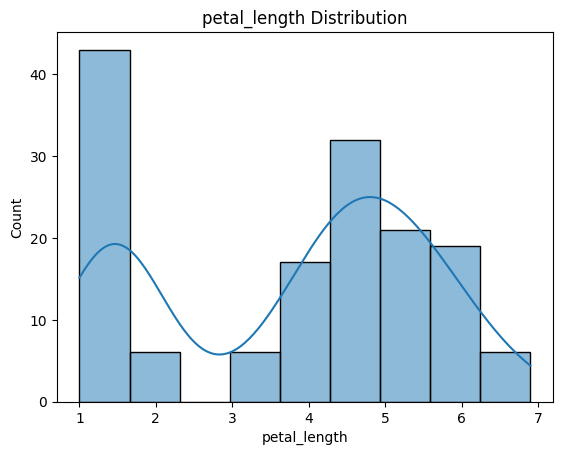

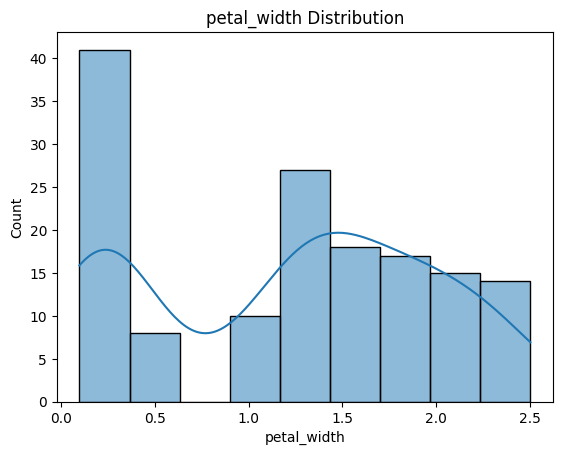

In [9]:
# Histograms for each numeric feature
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

4. Bivariate Scatter Plots

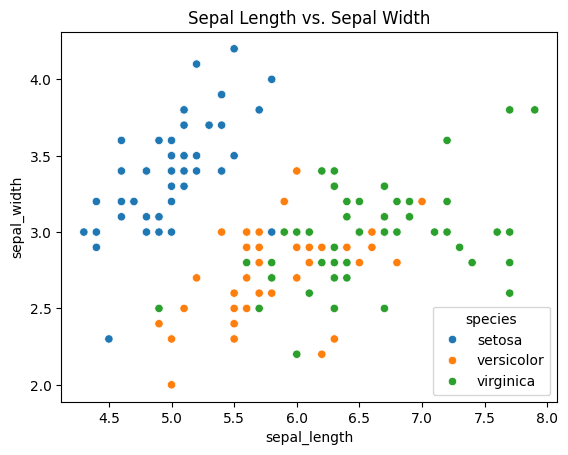

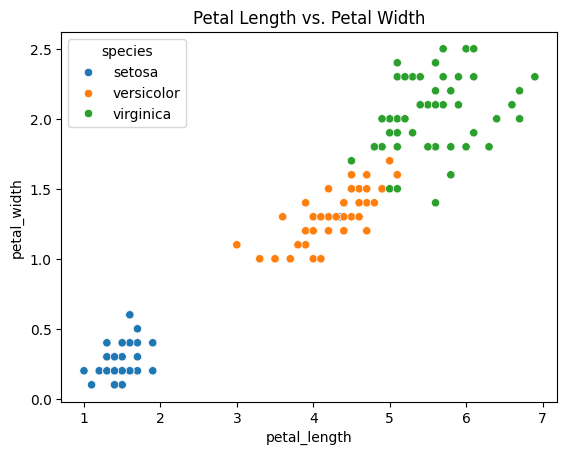

In [10]:
# Pairwise scatter of two features, colored by species
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title("Sepal Length vs. Sepal Width")
plt.show()

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Petal Length vs. Petal Width")
plt.show()

5. Correlation Matrix & Heatmap

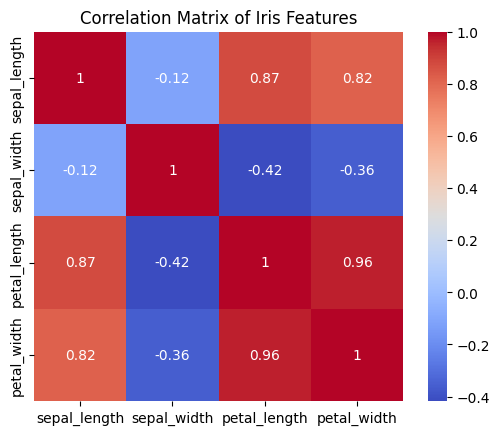

In [11]:
# Compute correlations
corr = df[numeric_cols].corr()

# Visualize
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Iris Features")
plt.show()

6. Multivariate Pairplot

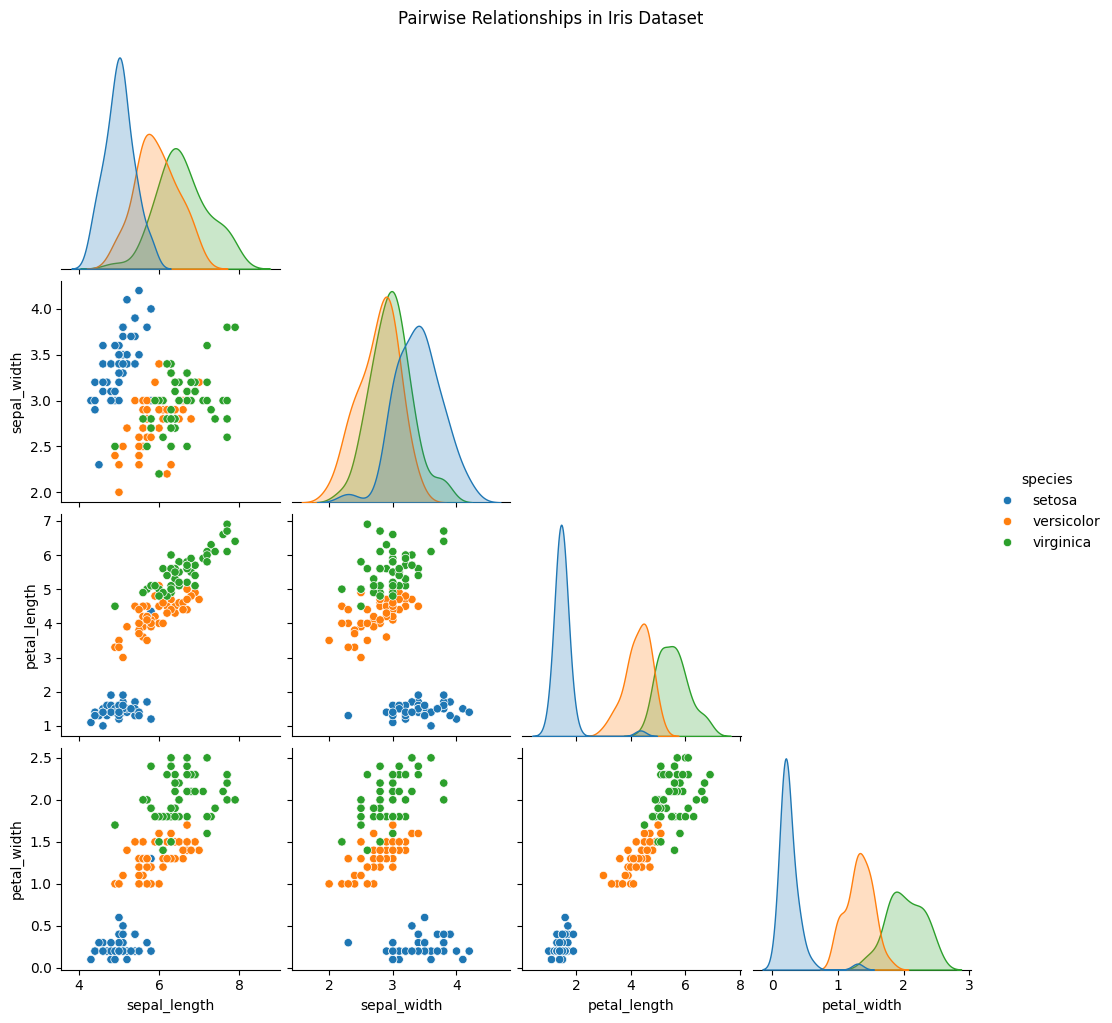

In [12]:
# Pairplot across all numeric features
sns.pairplot(df, hue="species", corner=True)
plt.suptitle("Pairwise Relationships in Iris Dataset", y=1.02)
plt.show()

7. Categorical Counts

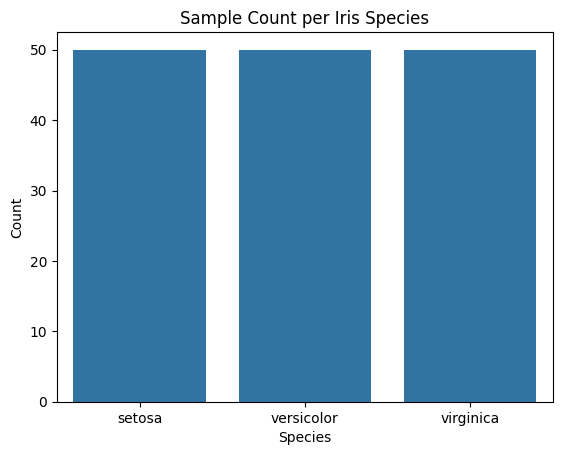

In [13]:
# Count of each species
sns.countplot(data=df, x="species")
plt.title("Sample Count per Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()